
Covariance Matrix:
 [[ 1.11111111 -1.11111111  1.0825951   1.09237265  1.08601397]
 [-1.11111111  1.11111111 -1.0825951  -1.09237265 -1.08601397]
 [ 1.0825951  -1.0825951   1.11111111  1.09635305  1.09205687]
 [ 1.09237265 -1.09237265  1.09635305  1.11111111  1.08648682]
 [ 1.08601397 -1.08601397  1.09205687  1.08648682  1.11111111]]

Eigen Values
 [ 5.47431542e+00  4.49736023e-02 -3.97089046e-17  1.12267281e-02
  2.50398033e-02]

Eigen Vectors
 [[ 4.47946714e-01 -5.24096464e-01 -7.07106781e-01  1.51108710e-01
   4.28111593e-02]
 [-4.47946714e-01  5.24096464e-01 -7.07106781e-01 -1.51108710e-01
  -4.28111593e-02]
 [ 4.46423349e-01  5.49997182e-01 -6.55147175e-15  6.57170059e-01
  -2.57559327e-01]
 [ 4.47572604e-01  1.45088913e-01  2.03155458e-15 -6.56533731e-01
  -5.89568852e-01]
 [ 4.46175347e-01  3.56508203e-01  1.28528288e-14 -3.02362844e-01
   7.63155404e-01]]

Principal Components: 
 [[ 0.44794671 -0.52409646]
 [-0.44794671  0.52409646]
 [ 0.44642335  0.54999718]
 [ 0.4475726   0.

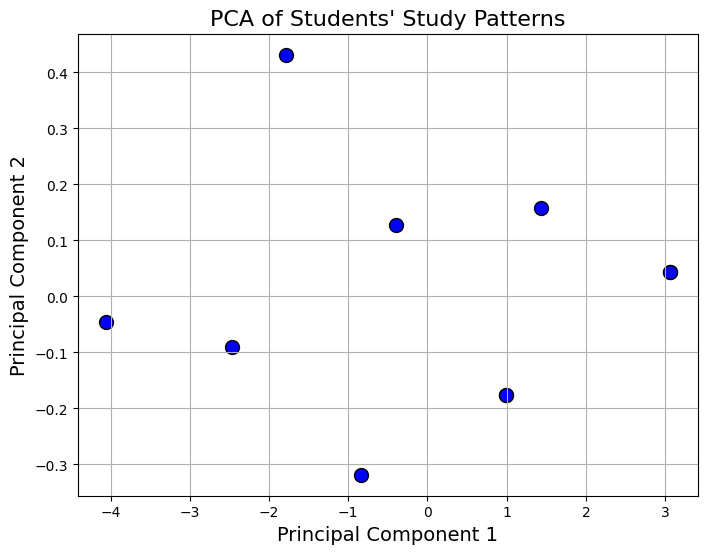

In [1]:
# PCA METHOD
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Simulated data for 10 students
data = {
    "Study Hours": [5, 3, 4, 6, 5, 2, 3, 4, 5, 6],
    "Recreation Hours": [2, 4, 3, 1, 2, 5, 4, 3, 2, 1],
    "Attendance (%)": [90, 75, 80, 95, 85, 60, 70, 75, 85, 95],
    "Assignments Submitted": [8, 5, 6, 9, 7, 3, 4, 6, 7, 9],
    "Sleep Hours": [7, 6, 6.5, 8, 7, 5, 5.5, 6, 7, 8]
}

df = pd.DataFrame(data)

# Method 2 FOR LOADING DATA
# url = 'https://raw.githubusercontent.com/akki8087/Big-Mart-Sales/refs/heads/master/Train.csv'
# df = pd.read_csv(url)

# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Covariance matrix
cov_matrix = np.cov(data_scaled.T)
print("\nCovariance Matrix:\n", cov_matrix)

# Eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("\nEigen Values\n", eigenvalues)
print("\nEigen Vectors\n", eigenvectors)

# Sort eigenvalues and eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Choose top 2 principal components
n_components = 2
principal_components = sorted_eigenvectors[:, :n_components]
print("\nPrincipal Components: \n", principal_components)

# Project data onto principal components
transformed_data = np.dot(data_scaled, principal_components)
print("\nTransformed Data:\n", transformed_data)

# Explained variance ratio using PCA
pca = PCA(n_components=n_components)
pca.fit(data_scaled)
print("\nExplained Variance Ratio:", pca.explained_variance_ratio_)

# Create a DataFrame for visualization
pca_df = pd.DataFrame(
    transformed_data,
    columns=["Principal Component 1", "Principal Component 2"]
)

# Plot the principal components
plt.figure(figsize=(8, 6))
plt.scatter(
    pca_df["Principal Component 1"],
    pca_df["Principal Component 2"],
    c="blue",
    edgecolor="k",
    s=100
)
plt.title("PCA of Students' Study Patterns", fontsize=16)
plt.xlabel("Principal Component 1", fontsize=14)
plt.ylabel("Principal Component 2", fontsize=14)
plt.grid(True)
plt.show()